In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [4]:
df['TV'] = df['TV'].astype(float)
df['Sales'] = df['Sales'].astype(float)

In [5]:
df.dtypes

TV       float64
Sales    float64
dtype: object

Text(0, 0.5, 'Sales')

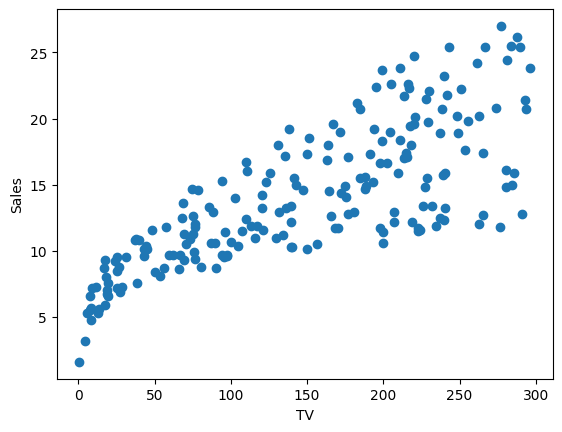

In [7]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

In [9]:
X=df[['TV']]
y=df['Sales']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160,), (40,))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

c:\Users\ZaidFaruqui\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


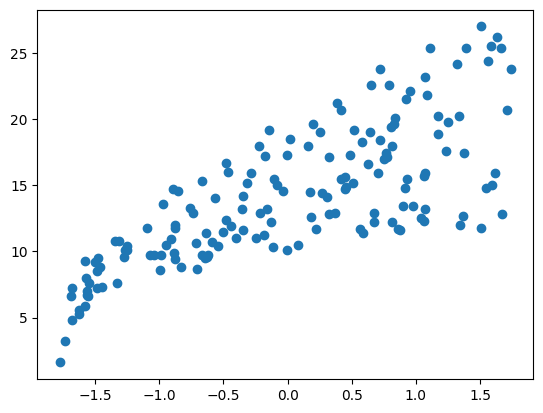

In [18]:
plt.scatter(X_train,y_train)

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
print("Slope: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

Slope:  [3.91569271]
Intercept:  14.1


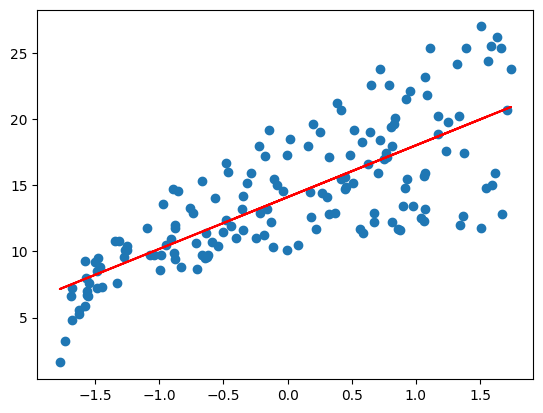

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), 'r')

In [27]:
y_pred_test = regressor.predict(X_test)

In [28]:
y_pred_test,y_test

(array([ 653.53262017,  779.22635628, 1161.00639588,   59.91360475,
         876.72710485,  308.16852281,  863.02218035,  209.88463569,
         884.95005955,  699.73779419,  137.44432049,  234.16193052,
         932.32994139,   35.24474065,  560.33913358,  680.55089989,
          42.68455681,  787.84088025,  308.95166135,  943.68545026,
         912.75147782,  279.583966  ,  162.89632312,  996.5473019 ,
         284.28279725,  223.58956019,  850.1003944 ,  559.55599503,
         355.54840464,   46.9918188 ,  796.45540422,  285.0659358 ,
         792.93128078,   80.27520686, 1113.23494477,  946.81800443,
         203.22795808, 1085.82509577,  473.01918606,  121.78154963]),
 95     16.9
 15     22.4
 30     21.4
 158     7.3
 128    24.7
 115    12.6
 69     22.3
 170     8.4
 174    11.5
 45     14.9
 66      9.5
 182     8.7
 165    11.9
 78      5.3
 186    10.3
 177    11.7
 56      5.5
 152    16.6
 82     11.3
 68     18.9
 124    19.7
 16     12.5
 148    10.9
 93     22.2
 65   

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  402340.14739150956
MAE:  529.5346348811632
RMSE:  634.302883007408


In [30]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(y_test,y_pred_test)
score

-12745.968883779578

In [ ]:
# This model is not Good for this particular Dataset